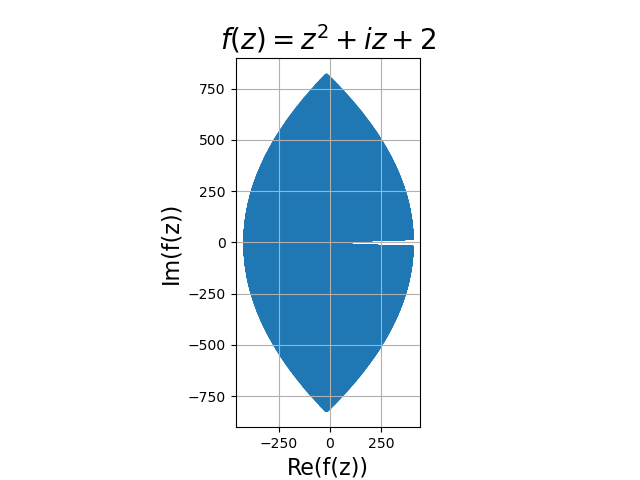

In [1]:
# complex_lattice.ipynb
# Cell 1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def f(z): #complex function we want to plot
    return z ** 2 + 1j * z + 1

def plot(ax):
    x = np.linspace(-20, 20, 1000) #real and imaginary domain, specified range
    y = np.linspace(0, 20, 1000) #imaginary domain needs to be positive up to 20 inclusive
    X, Y = np.meshgrid(x, y)
    z = f(X + Y * 1j) #create all complex numbers given the domains we have fed in
    
    ax.scatter(np.real(z), np.imag(z), s=(72.0 / plt.gcf().dpi) ** 2) #plot imaginary and 
    #real parts of z
    ax.set_title(rf"$f(z) = z^2 + iz + 2$", fontsize=20)
    ax.set_xlabel("Re(f(z))", fontsize=16)
    ax.set_ylabel("Im(f(z))", fontsize=16)
    ax.grid()
    #ax.set_xlim(-51, 51)
    #ax.set_ylim(-51, 51)
    ax.set_aspect("equal")
    
def main():
    plt.close("all")
    fig = plt.figure()
    ax = fig.add_subplot()
    plot(ax)
    plt.show()
    
main()

There are 14 Gaussian integers that meet the specifications.


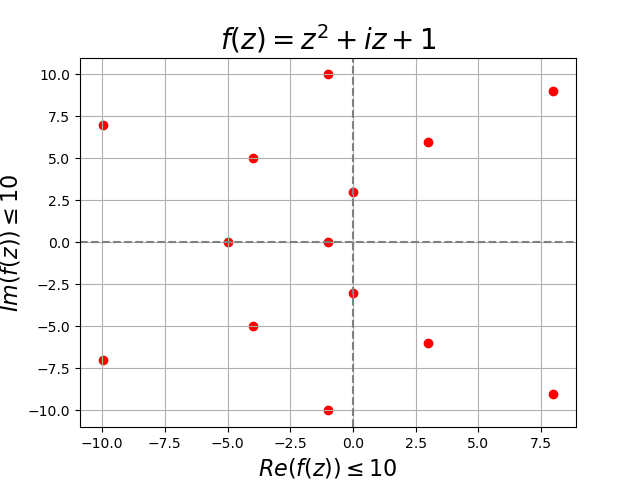

In [7]:
# complex_lattice.ipynb
# Cell 2

import os
import sys

def f(z):
    return z ** 2 + 1j * z + 1

def plot(ax):
    x = np.linspace(-1000, 1000, 2001) #grid is arbitrarily large to ensure we aren't missing
    #any integers such that the parts of f(z) the size requirement
    y = np.linspace(1, 1000, 1001)
    X, Y = np.meshgrid(x, y)
    z = f(X + Y*1j) #array of all possible complex numbers given the ranges we have fed in
    
    valid_x = np.abs(np.real(z)) <= 10 #vectorized, elements have true or false
    valid_y = np.abs(np.imag(z)) <= 10

    print(f'There are {np.count_nonzero(valid_x & valid_y)} Gaussian integers'
          ' that meet the specifications:')
    
    array = np.where(valid_x & valid_y, z, None) 
    integers = [] #find the valid gaussian integers, put them in a list with the intent to
    #plot them
    for column in array:
        for element in column:
            if element != None: #elements that aren't "none" are valid gaussian integers
                integers.append(element)
            
    ax.scatter(np.real(integers), np.imag(integers), color='red')
    ax.set_title(rf"$f(z) = z^2 + iz + 1$", fontsize=20)
    ax.set_xlabel(rf"$Re(f(z)) {{\leq}} 10$", fontsize=16)
    ax.set_ylabel(rf"$Im(f(z)) {{\leq}} 10$", fontsize=16)
    ax.axhline(0, linestyle='dashed', color="grey")  
    ax.axvline(0, linestyle='dashed', color="grey")

    ax.grid()
    
def main():
    plt.close("all")
    fig = plt.figure(os.path.basename(sys.argv[0]))
    gs = fig.add_gridspec(1, 1)  # 1 by 1 figure space
    ax = fig.add_subplot(gs[0, 0])  # first (only) plot in the figure space
    plot(ax)  # pass in ax, executes plot(ax)
    plt.show()  # show the plot
    
main()